Clonamos el repositorio donde se encuentran los datos con los que vamos a trabajar

In [2]:
!git clone https://github.com/jesussantiyan/TFG.git

Cloning into 'TFG'...
remote: Enumerating objects: 17, done.
remote: Counting objects: 100% (17/17), done.
remote: Compressing objects: 100% (15/15), done.
remote: Total 17 (delta 1), reused 3 (delta 0), pack-reused 0
Unpacking objects: 100% (17/17), 428.22 KiB | 2.53 MiB/s, done.


Realizamos los importes necesarios usados durante todo el cuaderno

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from pylab import rcParams
import statsmodels.api as sm
import itertools
import warnings
import numpy as np

#Datos de un solo cliente 

##Datos del primer cliente

Leemos el archivo .csv que contiene los datos del consumo del cliente

In [88]:
df = pd.read_csv('/content/TFG/DatosClientes/ConsumoHorario_Cliente1.csv', sep=',')
df.head()

,FechaHora,Consumo
0,2020-11-09 00:00:00,126.0
1,2020-11-09 01:00:00,80.0
2,2020-11-09 02:00:00,49.0
3,2020-11-09 03:00:00,103.0
4,2020-11-09 04:00:00,122.0


Convertimos las fechas de la columna "FechaHora" a su tipo correcto

In [89]:
df['FechaHora'] = pd.to_datetime(df['FechaHora'])

Ponemos como indices del dataset las fechas para poder realizar una visualización de los datos del mismo

In [90]:
df = df.set_index('FechaHora')
df.index

DatetimeIndex(['2020-11-09 00:00:00', '2020-11-09 01:00:00',
               '2020-11-09 02:00:00', '2020-11-09 03:00:00',
               '2020-11-09 04:00:00', '2020-11-09 05:00:00',
               '2020-11-09 06:00:00', '2020-11-09 07:00:00',
               '2020-11-09 08:00:00', '2020-11-09 09:00:00',
               ...
               '2022-09-17 14:00:00', '2022-09-17 15:00:00',
               '2022-09-17 16:00:00', '2022-09-17 17:00:00',
               '2022-09-17 18:00:00', '2022-09-17 19:00:00',
               '2022-09-17 20:00:00', '2022-09-17 21:00:00',
               '2022-09-17 22:00:00', '2022-09-17 23:00:00'],
              dtype='datetime64[ns]', name='FechaHora', length=16272, freq=None)

Preparamos los datos para una correcta visualización gráfica

In [91]:
y = df['Consumo']
y['2020':]

FechaHora
2020-11-09 00:00:00    126.0
2020-11-09 01:00:00     80.0
2020-11-09 02:00:00     49.0
2020-11-09 03:00:00    103.0
2020-11-09 04:00:00    122.0
                       ...  
2022-09-17 19:00:00    212.0
2022-09-17 20:00:00    212.0
2022-09-17 21:00:00    212.0
2022-09-17 22:00:00    212.0
2022-09-17 23:00:00    212.0
Name: Consumo, Length: 16272, dtype: float64

Visualizamos los datos iniciales para poder detectar algún patrón que nos ayude a realizar el análisis.
Como se puede ver el consumo de energía de este cliente es bastante irregular por lo que puede que no se trate de su vivienda habitual siendo usada durante periodos vacacionales como se puede ver en su consumo más elevado durante navidad o las vacaciones de verano

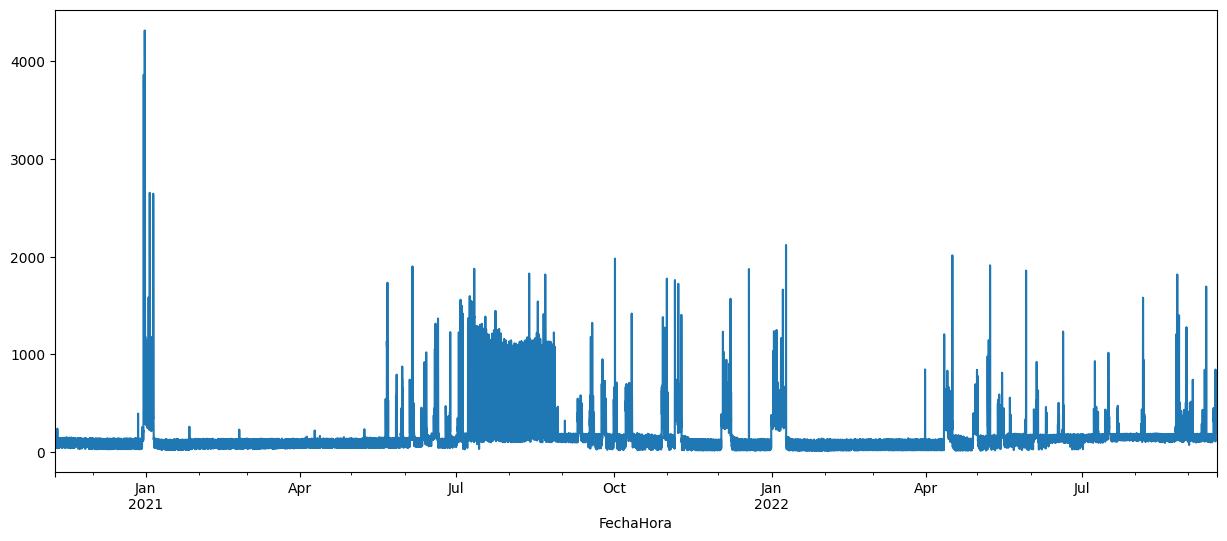

In [8]:
y.plot(figsize=(15, 6))
plt.show()

Visualizamos componentes de la prediccón como son la tendencia, la estacionalidad (por algún motivo sale mal) y la aleatoriedad

Se ha probado a cambiar a escala logarítmica para comporbar si se podía visualizar la gráfica "seasonal" sin obtener resultados

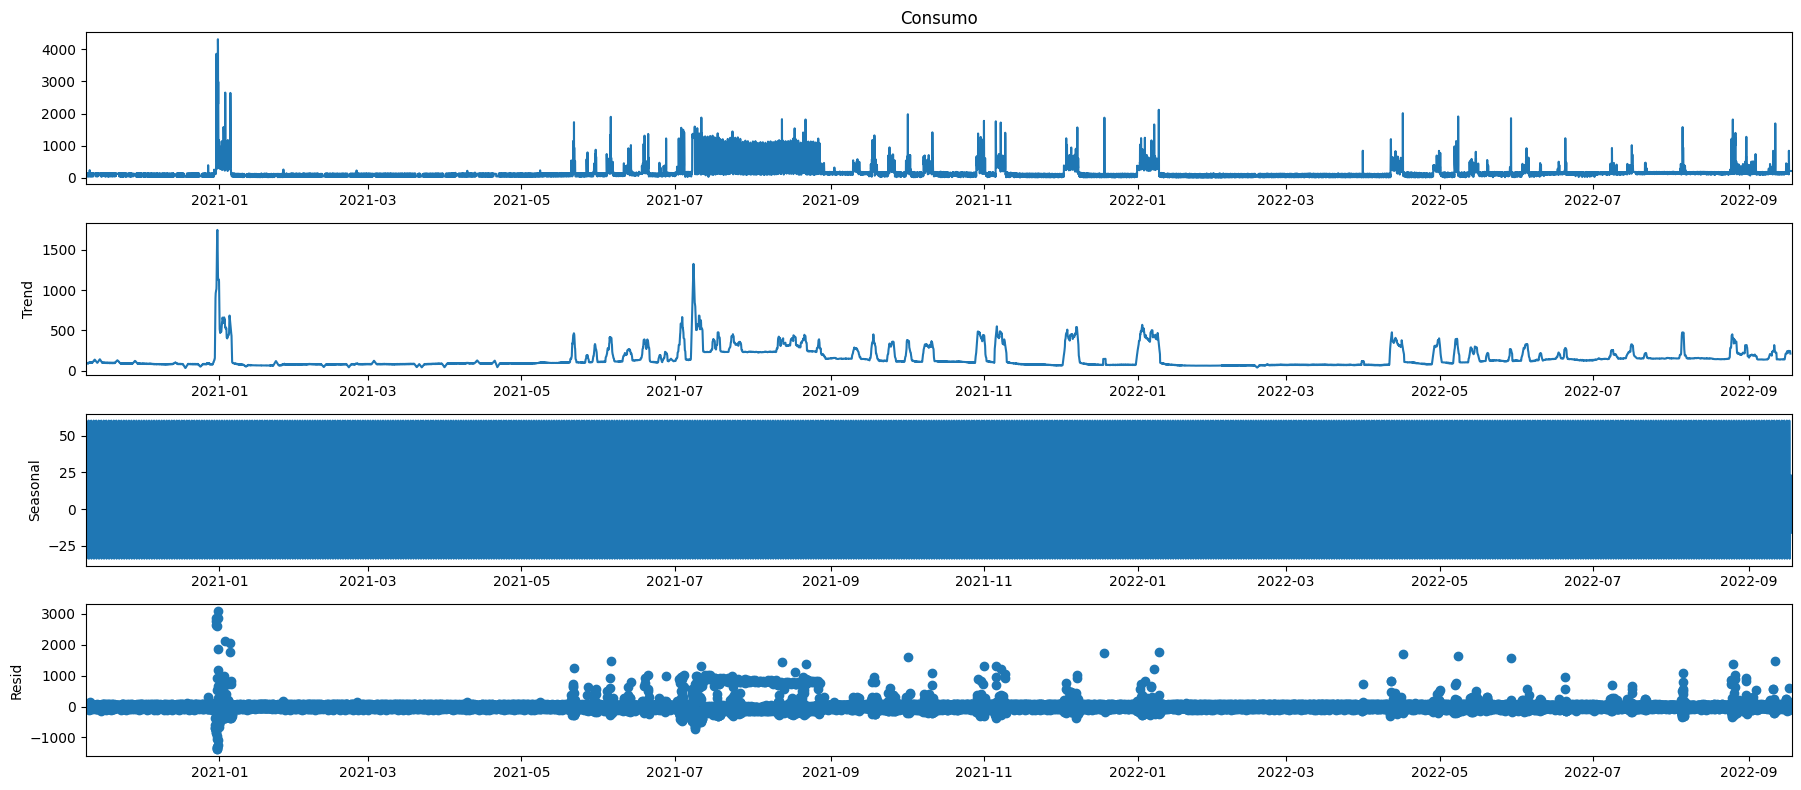

In [26]:
rcParams['figure.figsize'] = 18, 8

#y_log = np.log(y)
decomposition = sm.tsa.seasonal_decompose(y, model='additive')
fig = decomposition.plot()
plt.show()

Generamos una lista de combinaciones de parámetros para el modelo SARIMAX (Seasonal Autoregressive Integrated Moving Average with Exogenous Variables), tanto para los componentes no estacionales como para los componentes estacionales.

In [ ]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


Ajustamos una serie de modelos SARIMAX a una serie de tiempo utilizando diferentes combinaciones de parámetros no estacionales y estacionales. Luego, mostamos el valor del AIC para cada modelo ajustado.

In [ ]:
warnings.filterwarnings("ignore") # specify to ignore warning messages

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
  
            results = mod.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:225714.13020200978
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:222027.2974172074
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:221780.61294542765
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:213682.62081062002
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:218206.65735324877
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:213689.69837215845
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:215469.31112128857
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:213684.53633434238
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:215308.5658593024
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:213403.4091374451
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:216890.8685180627
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:207606.62620833243
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:211820.88103732635
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:207659.89853448537
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:210411.21822726098
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:207608.6063373041
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:209672.91689237228
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:209529.697107627

De todos los modelos ajustados anteriormente, escogemos el que menor valor AIC tiene para ajustar nuestro modelo y mostarar los coeficientes estimados del modelo

In [92]:
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 1, 1),
                                seasonal_order=(1, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

print(results.summary().tables[1])

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)


                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5217      0.002    230.210      0.000       0.517       0.526
ma.L1         -1.0681      0.001   -756.948      0.000      -1.071      -1.065
ar.S.L12      -0.1279      0.004    -33.684      0.000      -0.135      -0.120
ma.S.L12      -0.9425      0.001   -716.478      0.000      -0.945      -0.940
sigma2      1.511e+04     49.832    303.266      0.000     1.5e+04    1.52e+04


Visualizamos los gráficos de diagnostico para evaluar la calidad del modelo 

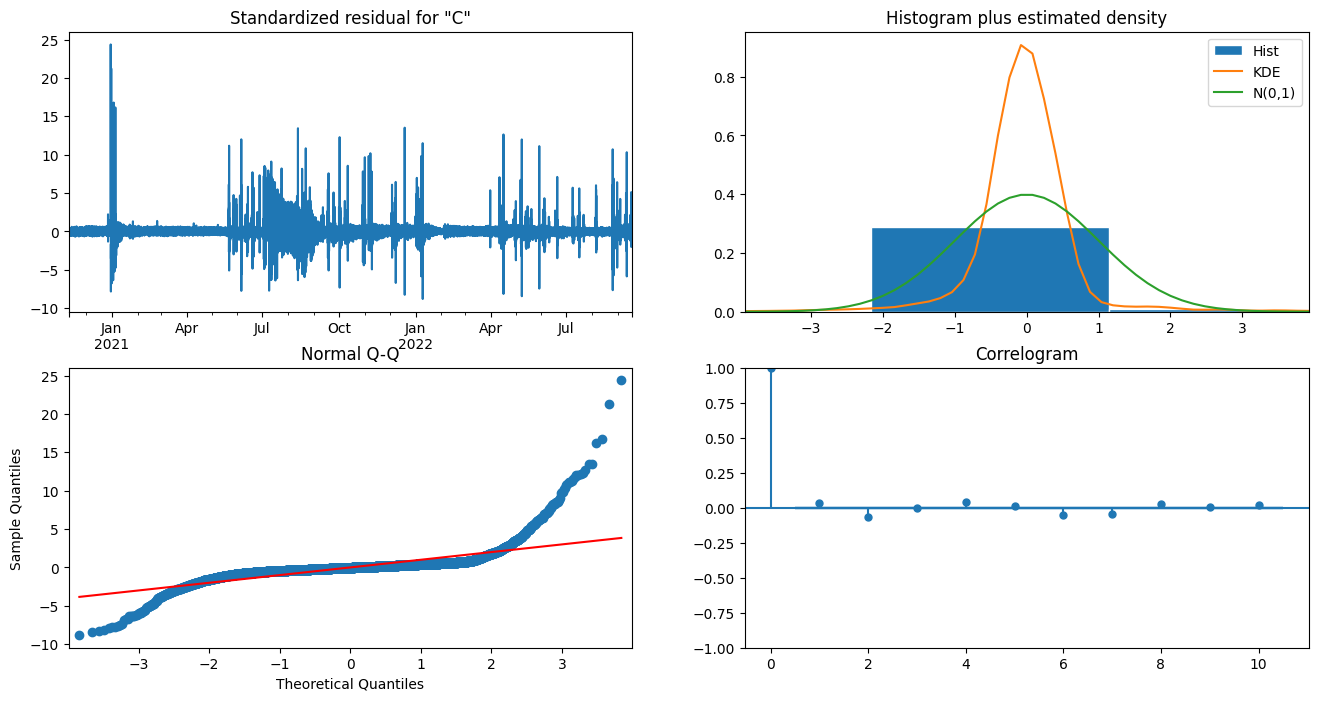

In [93]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

Utilizando el modelo ajustado anteriormente visualizamos en un gráfico los datos observados junto con las predicciones

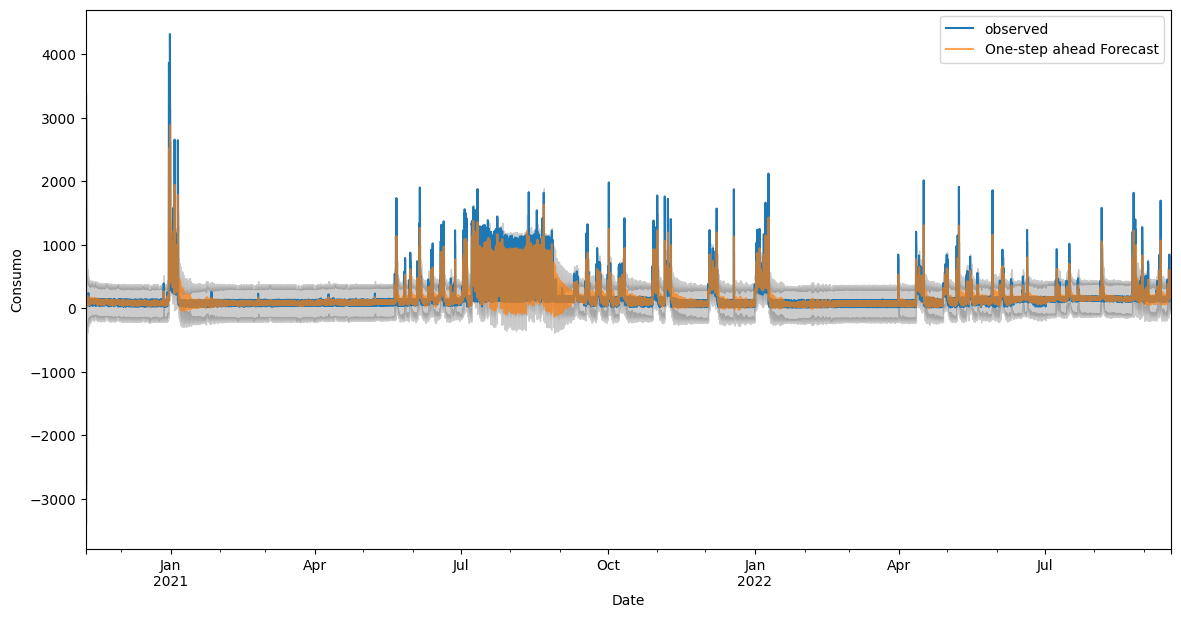

In [94]:
pred = results.get_prediction(start=pd.to_datetime('2020-11-09'), dynamic=False)
pred_ci = pred.conf_int()

ax = y['2020':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Date')
ax.set_ylabel('Consumo')
plt.legend()

plt.show()

Cuantificamos el rendimiento predictivo de nuestras previsiones mediante el cálculo de la MSE

In [ ]:
y_forecasted = pred.predicted_mean
y_truth = y['2020-11-09':]

mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Mean Squared Error of our forecasts is 17222.86
The Root Mean Squared Error of our forecasts is 131.24


##Datos del segundo cliente

Leemos el archivo .csv que contiene los datos del consumo del cliente

In [51]:
df = pd.read_csv('/content/TFG/DatosClientes/ConsumoHorario_Cliente2.csv', sep=',')
df.head()

,FechaHora,Consumo
0,2020-11-09 00:00:00,2.0
1,2020-11-09 01:00:00,28.0
2,2020-11-09 02:00:00,109.0
3,2020-11-09 03:00:00,106.0
4,2020-11-09 04:00:00,4.0


Convertimos las fechas de la columna "FechaHora" a su tipo correcto

In [52]:
df['FechaHora'] = pd.to_datetime(df['FechaHora'])

Ponemos como indices del dataset las fechas para poder realizar una visualización de los datos del mismo

In [53]:
df = df.set_index('FechaHora')
df.index

DatetimeIndex(['2020-11-09 00:00:00', '2020-11-09 01:00:00',
               '2020-11-09 02:00:00', '2020-11-09 03:00:00',
               '2020-11-09 04:00:00', '2020-11-09 05:00:00',
               '2020-11-09 06:00:00', '2020-11-09 07:00:00',
               '2020-11-09 08:00:00', '2020-11-09 09:00:00',
               ...
               '2022-09-17 14:00:00', '2022-09-17 15:00:00',
               '2022-09-17 16:00:00', '2022-09-17 17:00:00',
               '2022-09-17 18:00:00', '2022-09-17 19:00:00',
               '2022-09-17 20:00:00', '2022-09-17 21:00:00',
               '2022-09-17 22:00:00', '2022-09-17 23:00:00'],
              dtype='datetime64[ns]', name='FechaHora', length=16272, freq=None)

Preparamos los datos para una correcta visualización gráfica

In [54]:
y = df['Consumo']
y['2020':]

FechaHora
2020-11-09 00:00:00      2.0
2020-11-09 01:00:00     28.0
2020-11-09 02:00:00    109.0
2020-11-09 03:00:00    106.0
2020-11-09 04:00:00      4.0
                       ...  
2022-09-17 19:00:00      0.0
2022-09-17 20:00:00      0.0
2022-09-17 21:00:00      0.0
2022-09-17 22:00:00      0.0
2022-09-17 23:00:00      0.0
Name: Consumo, Length: 16272, dtype: float64

Visualizamos los datos iniciales para poder detectar algún patrón que nos ayude a realizar el análisis.
Como se puede ver el consumo de energía de este cliente es bastante constante y alto durante todos los meses siendo más bajo el consumo en verano

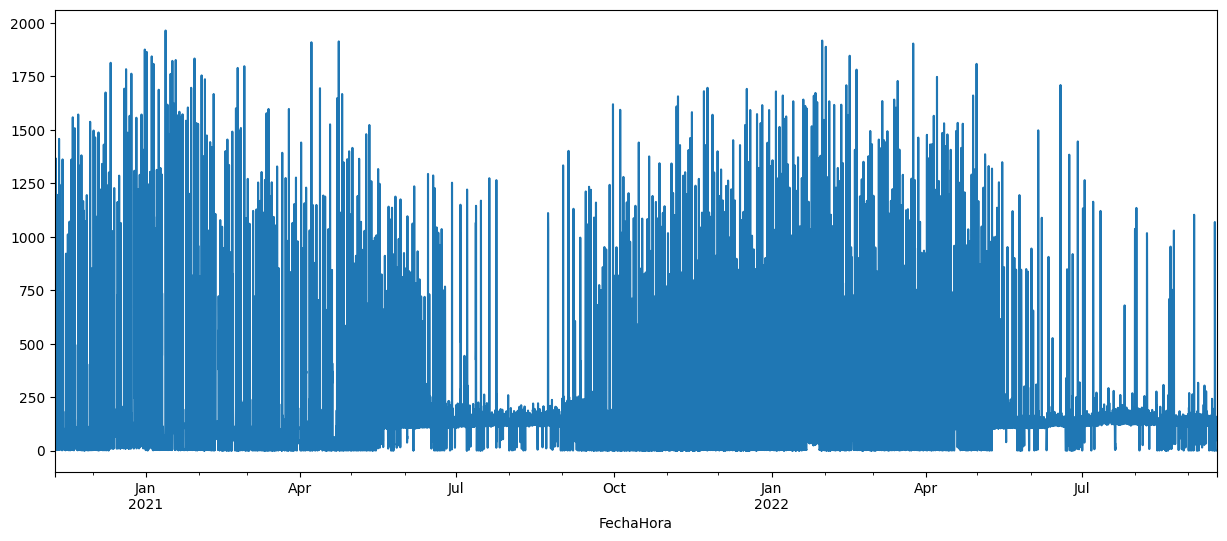

In [55]:
y.plot(figsize=(15, 6))
plt.show()

Visualizamos componentes de la prediccón como son la tendencia, la estacionalidad (por algún motivo sale mal) y la aleatoriedad

Se ha probado a cambiar a escala logarítmica para comporbar si se podía visualizar la gráfica "seasonal" sin obtener resultados

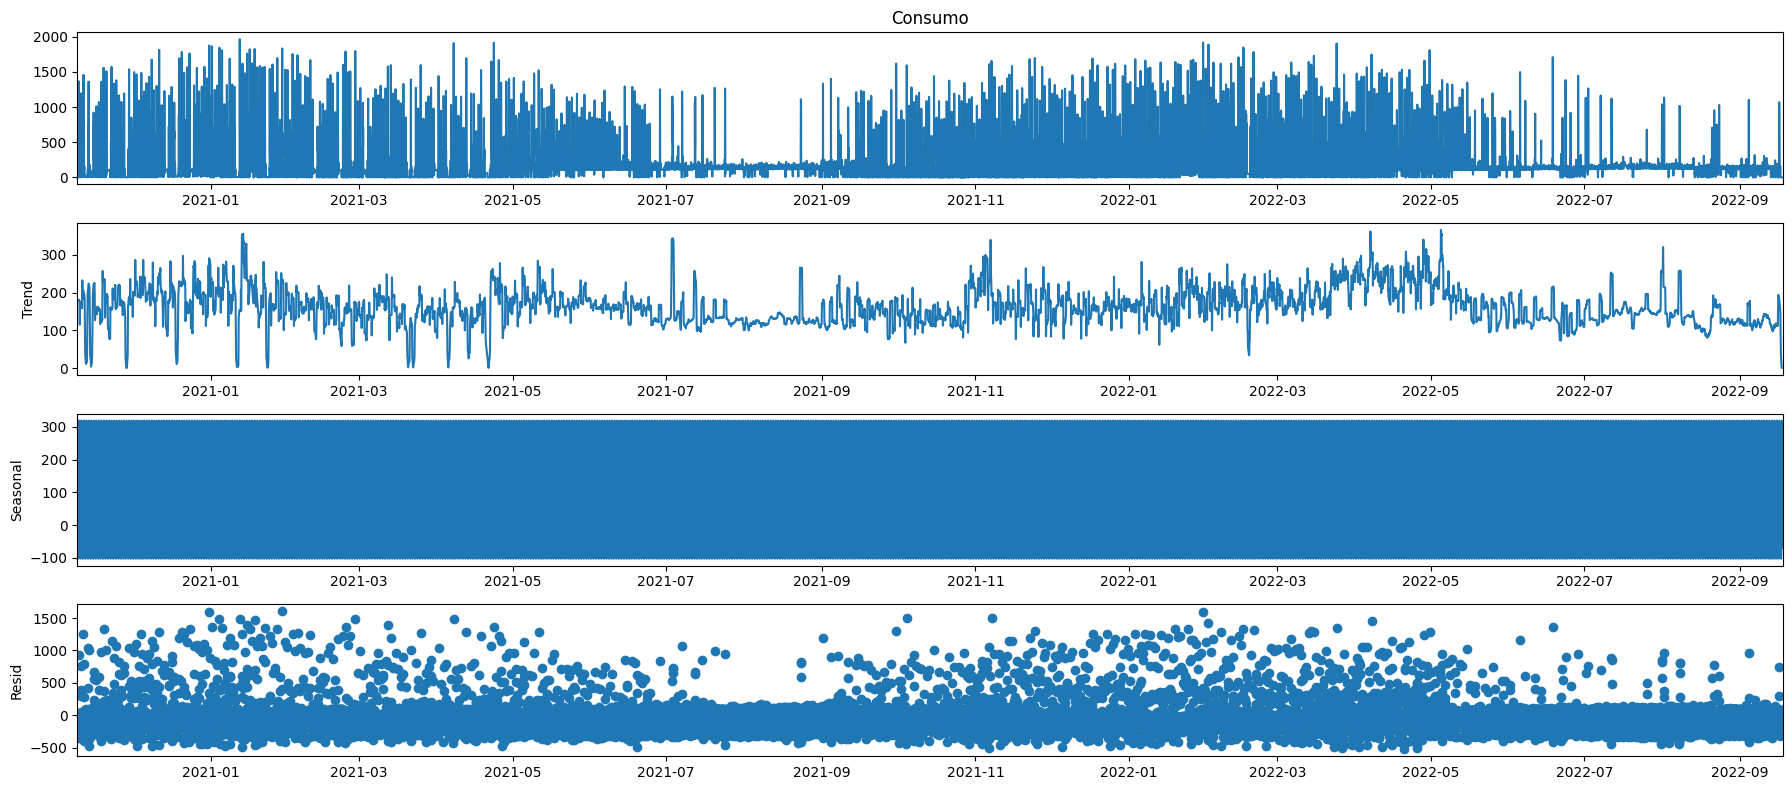

In [58]:
rcParams['figure.figsize'] = 18, 8

#y_log = np.log1p(y)
decomposition = sm.tsa.seasonal_decompose(y, model='additive')
fig = decomposition.plot()
plt.show()

Generamos una lista de combinaciones de parámetros para el modelo SARIMAX (Seasonal Autoregressive Integrated Moving Average with Exogenous Variables), tanto para los componentes no estacionales como para los componentes estacionales.

In [ ]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


Ajustamos una serie de modelos SARIMAX a una serie de tiempo utilizando diferentes combinaciones de parámetros no estacionales y estacionales. Luego, mostamos el valor del AIC para cada modelo ajustado.

In [ ]:
warnings.filterwarnings("ignore") # specify to ignore warning messages

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
  
            results = mod.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:231627.26545544405
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:231156.72532916034
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:239184.0706204035
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:223810.020597706
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:230830.87662546078
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:223990.5814957387
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:226470.3892915669
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:222059.91676056324
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:227296.44494829274
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:226974.8210526053
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:236114.8116413418
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:221924.24176298207
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:226881.01999242473
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:222104.66320780458
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:225742.0382793544
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:220968.99821045983
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:229843.88042386435
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:229665.75621151313


De todos los modelos ajustados anteriormente, escogemos el que menor valor AIC tiene para ajustar nuestro modelo y mostarar los coeficientes estimados del modelo

In [ ]:
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(0, 1, 1),
                                seasonal_order=(1, 0, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.9954      0.001  -1310.239      0.000      -0.997      -0.994
ar.S.L12      -0.9978      0.000  -2437.655      0.000      -0.999      -0.997
ma.S.L12       0.9649      0.002    519.892      0.000       0.961       0.969
sigma2      4.649e+04    247.501    187.852      0.000     4.6e+04     4.7e+04


Visualizamos los gráficos de diagnostico para evaluar la calidad del modelo 

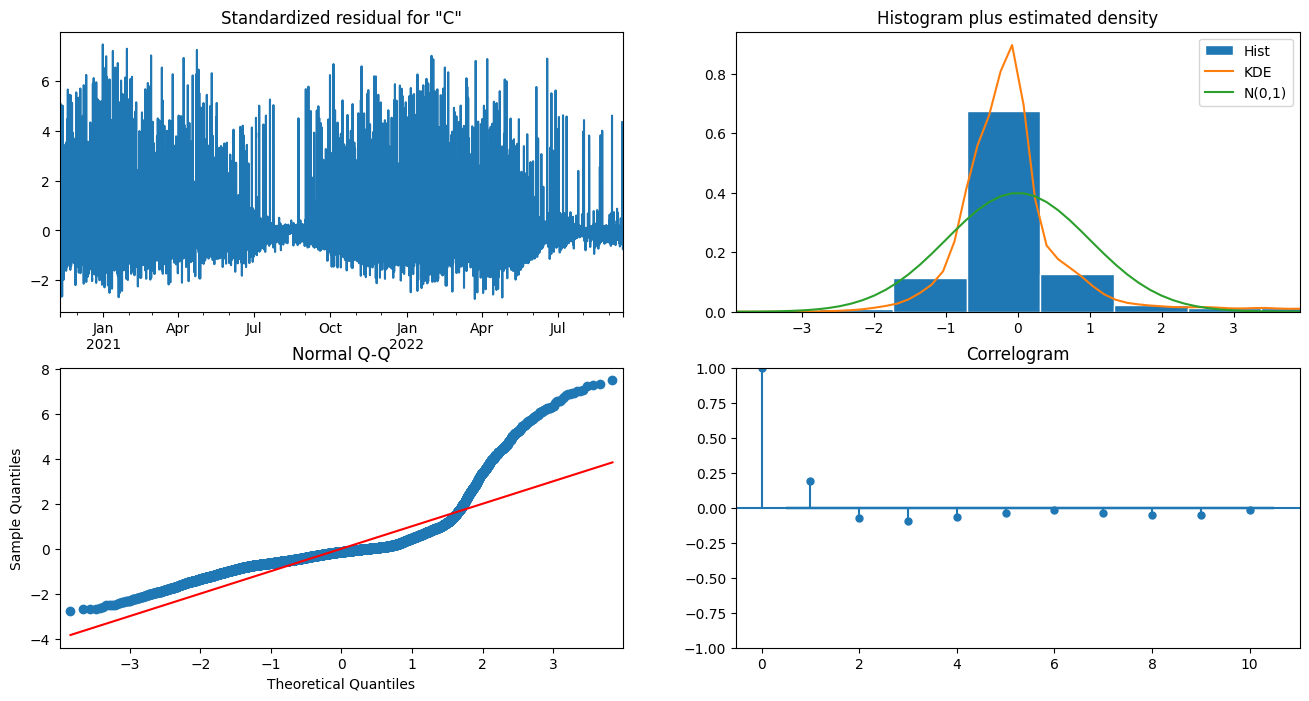

In [ ]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

Utilizando el modelo ajustado anteriormente visualizamos en un gráfico los datos observados junto con las predicciones

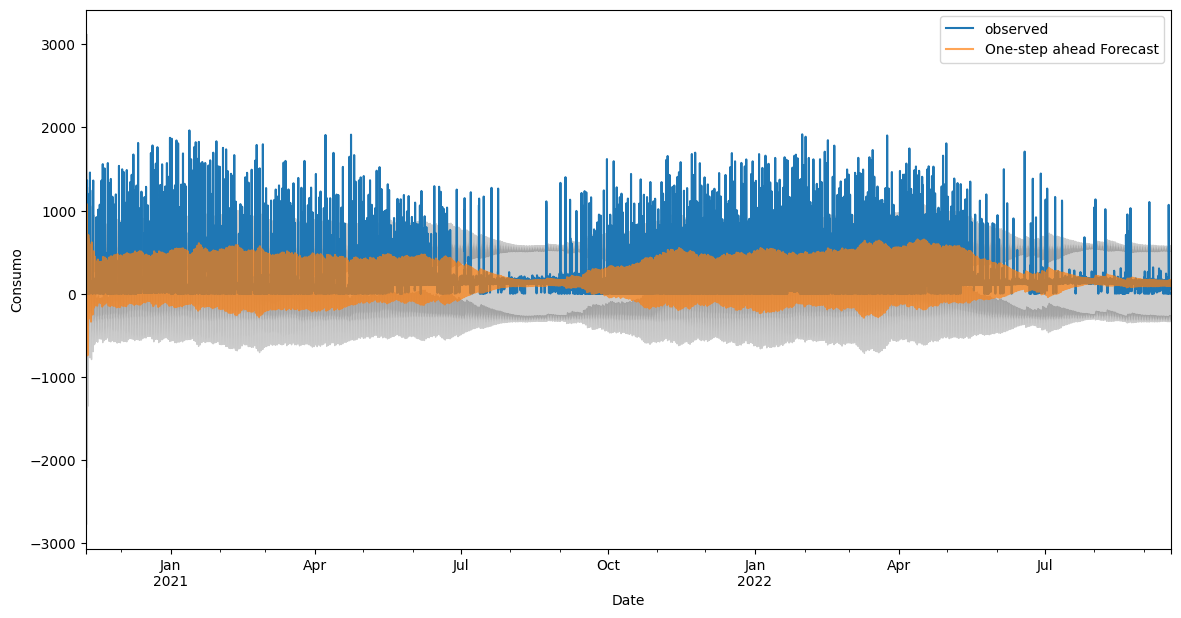

In [ ]:
pred = results.get_prediction(start=pd.to_datetime('2020-11-09'), dynamic=False)
pred_ci = pred.conf_int()

ax = y['2020':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Date')
ax.set_ylabel('Consumo')
plt.legend()

plt.show()

Cuantificamos el rendimiento predictivo de nuestras previsiones mediante el cálculo de la MSE

In [ ]:
y_forecasted = pred.predicted_mean
y_truth = y['2020-11-09':]

mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Mean Squared Error of our forecasts is 46779.55
The Root Mean Squared Error of our forecasts is 216.29


##Datos del tercer cliente

Leemos el archivo .csv que contiene los datos del consumo del cliente

In [59]:
df = pd.read_csv('/content/TFG/DatosClientes/ConsumoHorario_Cliente3.csv', sep=',')
df.head()

,FechaHora,Consumo
0,2020-11-09 00:00:00,279.0
1,2020-11-09 01:00:00,96.0
2,2020-11-09 02:00:00,105.0
3,2020-11-09 03:00:00,105.0
4,2020-11-09 04:00:00,80.0


Convertimos las fechas de la columna "FechaHora" a su tipo correcto

In [60]:
df['FechaHora'] = pd.to_datetime(df['FechaHora'])

Ponemos como indices del dataset las fechas para poder realizar una visualización de los datos del mismo

In [61]:
df = df.set_index('FechaHora')
df.index

DatetimeIndex(['2020-11-09 00:00:00', '2020-11-09 01:00:00',
               '2020-11-09 02:00:00', '2020-11-09 03:00:00',
               '2020-11-09 04:00:00', '2020-11-09 05:00:00',
               '2020-11-09 06:00:00', '2020-11-09 07:00:00',
               '2020-11-09 08:00:00', '2020-11-09 09:00:00',
               ...
               '2022-09-17 14:00:00', '2022-09-17 15:00:00',
               '2022-09-17 16:00:00', '2022-09-17 17:00:00',
               '2022-09-17 18:00:00', '2022-09-17 19:00:00',
               '2022-09-17 20:00:00', '2022-09-17 21:00:00',
               '2022-09-17 22:00:00', '2022-09-17 23:00:00'],
              dtype='datetime64[ns]', name='FechaHora', length=16272, freq=None)

Preparamos los datos para una correcta visualización gráfica

In [62]:
y = df['Consumo']
y['2020':]

FechaHora
2020-11-09 00:00:00    279.0
2020-11-09 01:00:00     96.0
2020-11-09 02:00:00    105.0
2020-11-09 03:00:00    105.0
2020-11-09 04:00:00     80.0
                       ...  
2022-09-17 19:00:00    136.0
2022-09-17 20:00:00    136.0
2022-09-17 21:00:00    136.0
2022-09-17 22:00:00    136.0
2022-09-17 23:00:00    136.0
Name: Consumo, Length: 16272, dtype: float64

Visualizamos los datos iniciales para poder detectar algún patrón que nos ayude a realizar el análisis.
Como se puede ver el consumo de energía de este cliente es bastante más alto durante los meses más frios y más baja durante los meses de más calor

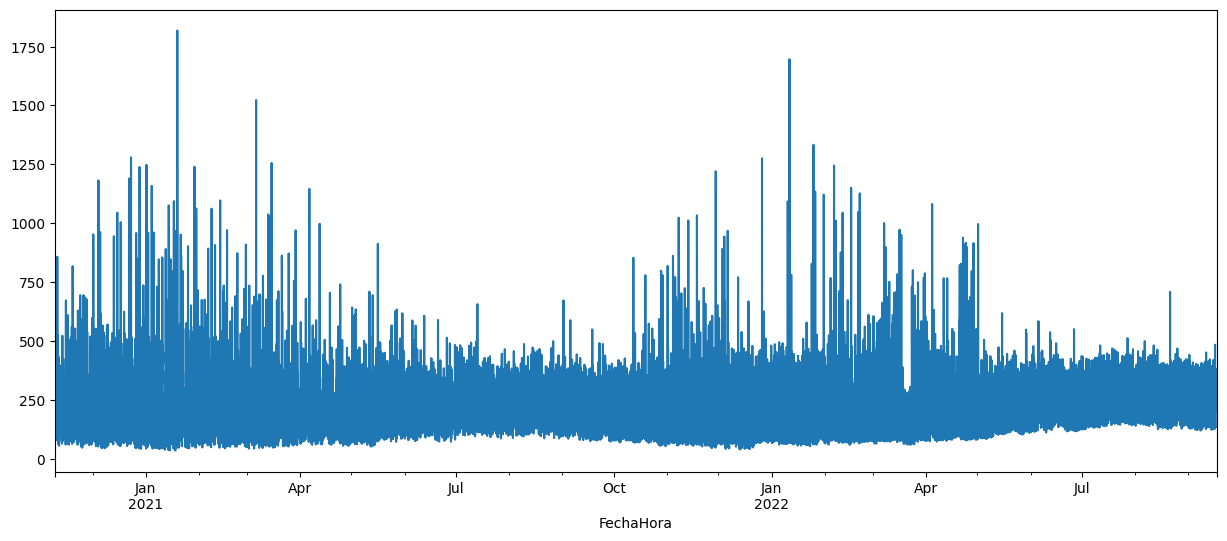

In [63]:
y.plot(figsize=(15, 6))
plt.show()

Visualizamos componentes de la prediccón como son la tendencia, la estacionalidad (por algún motivo sale mal) y la aleatoriedad

Se ha probado a cambiar a escala logarítmica para comporbar si se podía visualizar la gráfica "seasonal" sin obtener resultados

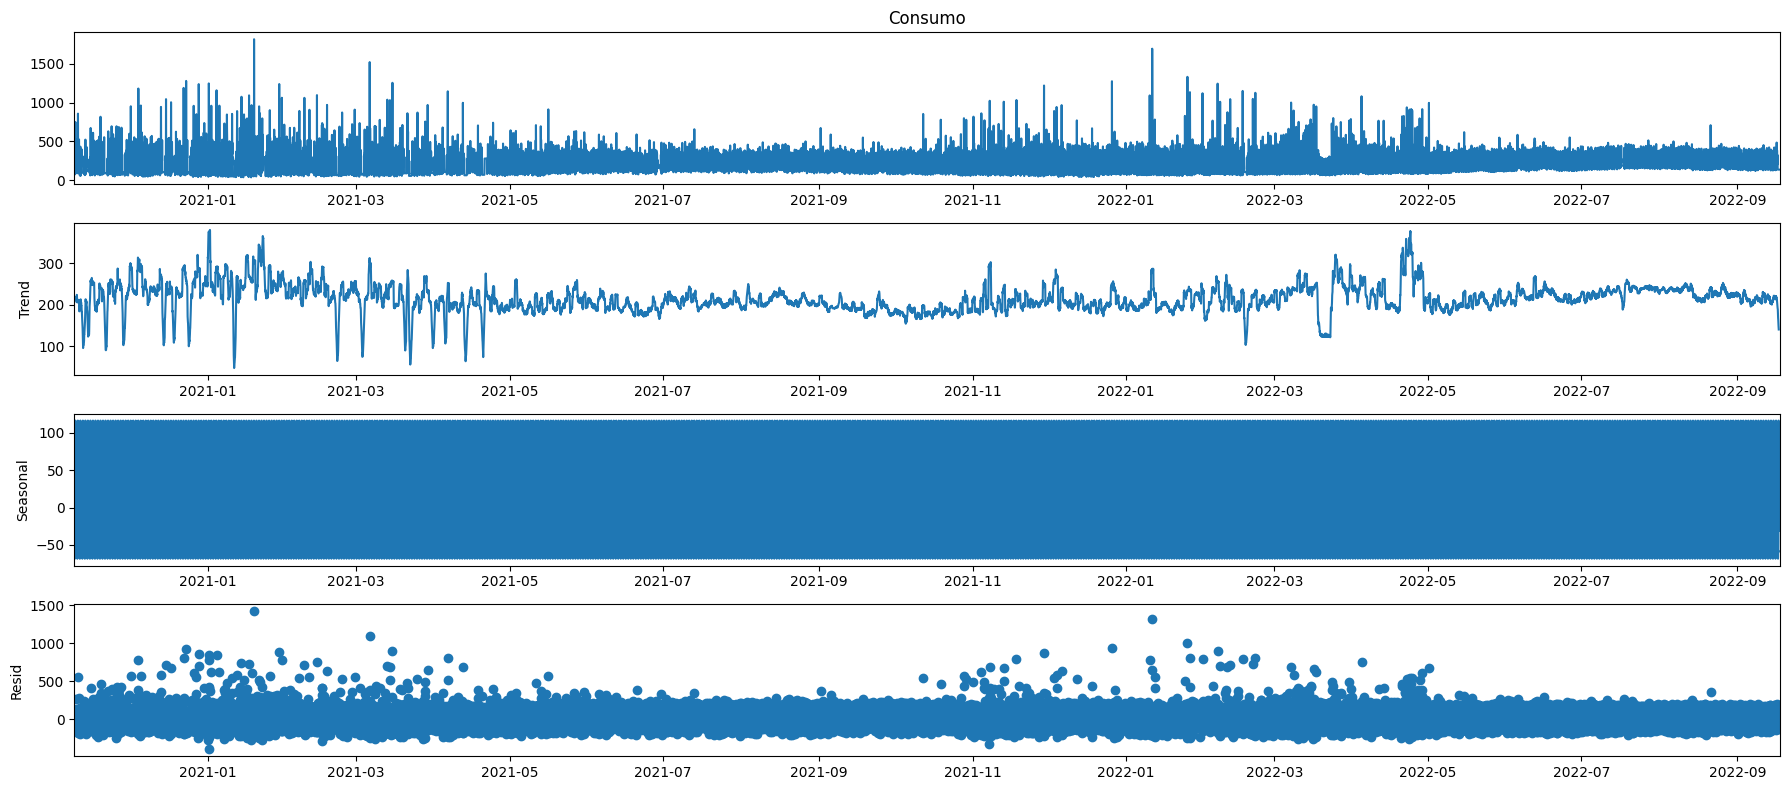

In [65]:
rcParams['figure.figsize'] = 18, 8

#y_log = np.log(y)
decomposition = sm.tsa.seasonal_decompose(y, model='additive')
fig = decomposition.plot()
plt.show()

Generamos una lista de combinaciones de parámetros para el modelo SARIMAX (Seasonal Autoregressive Integrated Moving Average with Exogenous Variables), tanto para los componentes no estacionales como para los componentes estacionales.

In [ ]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


Ajustamos una serie de modelos SARIMAX a una serie de tiempo utilizando diferentes combinaciones de parámetros no estacionales y estacionales. Luego, mostamos el valor del AIC para cada modelo ajustado.

In [ ]:
warnings.filterwarnings("ignore") # specify to ignore warning messages

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
  
            results = mod.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:226373.63400690065
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:221593.80856799422
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:217636.60492532645
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:204438.02613726142
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:215051.0260895597
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:205248.98945687874
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:208236.21197968762
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:204036.1217119148
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:219717.34797034535
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:217279.47905877832
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:217301.61105610413
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:204330.32543069636
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:214040.08735097252
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:204498.37472225743
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:208224.00888984557
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:203983.43029061935
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:215509.52156906406
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:215326.181093

De todos los modelos ajustados anteriormente, escogemos el que menor valor AIC tiene para ajustar nuestro modelo y mostarar los coeficientes estimados del modelo

In [ ]:
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 1, 1),
                                seasonal_order=(1, 0, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0175      0.006     -3.152      0.002      -0.028      -0.007
ma.L1         -1.0155      0.001   -820.697      0.000      -1.018      -1.013
ar.S.L12      -0.9967      0.001  -1660.309      0.000      -0.998      -0.996
ma.S.L12       0.9664      0.002    527.524      0.000       0.963       0.970
sigma2       1.53e+04     97.883    156.343      0.000    1.51e+04    1.55e+04


Visualizamos los gráficos de diagnostico para evaluar la calidad del modelo 

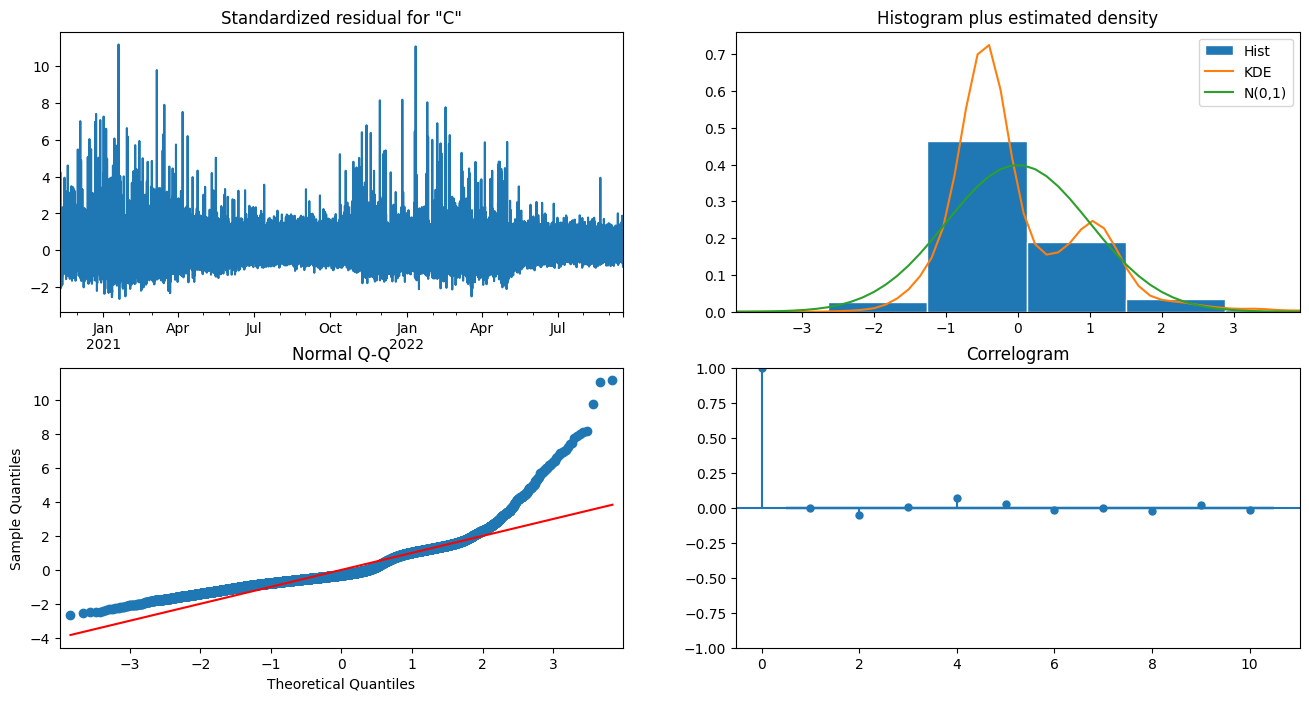

In [ ]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

Utilizando el modelo ajustado anteriormente visualizamos en un gráfico los datos observados junto con las predicciones

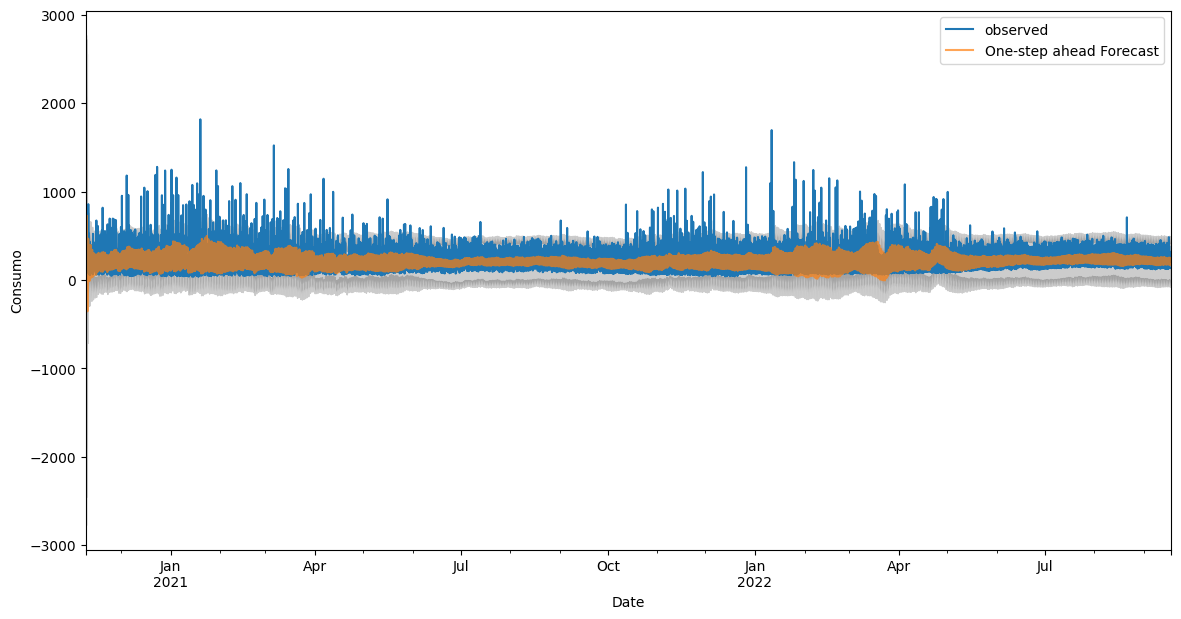

In [ ]:
pred = results.get_prediction(start=pd.to_datetime('2020-11-09'), dynamic=False)
pred_ci = pred.conf_int()

ax = y['2020':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Date')
ax.set_ylabel('Consumo')
plt.legend()

plt.show()

Cuantificamos el rendimiento predictivo de nuestras previsiones mediante el cálculo de la MSE

In [ ]:
y_forecasted = pred.predicted_mean
y_truth = y['2020-11-09':]

mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Mean Squared Error of our forecasts is 15900.33
The Root Mean Squared Error of our forecasts is 126.1


##Datos del cuarto cliente

Leemos el archivo .csv que contiene los datos del consumo del cliente

In [66]:
df = pd.read_csv('/content/TFG/DatosClientes/ConsumoHorario_Cliente4.csv', sep=',')
df.head()

,FechaHora,Consumo
0,2020-11-09 00:00:00,372.0
1,2020-11-09 01:00:00,314.0
2,2020-11-09 02:00:00,313.0
3,2020-11-09 03:00:00,293.0
4,2020-11-09 04:00:00,259.0


Convertimos las fechas de la columna "FechaHora" a su tipo correcto

In [67]:
df['FechaHora'] = pd.to_datetime(df['FechaHora'])

Ponemos como indices del dataset las fechas para poder realizar una visualización de los datos del mismo

In [68]:
df = df.set_index('FechaHora')
df.index

DatetimeIndex(['2020-11-09 00:00:00', '2020-11-09 01:00:00',
               '2020-11-09 02:00:00', '2020-11-09 03:00:00',
               '2020-11-09 04:00:00', '2020-11-09 05:00:00',
               '2020-11-09 06:00:00', '2020-11-09 07:00:00',
               '2020-11-09 08:00:00', '2020-11-09 09:00:00',
               ...
               '2022-09-17 14:00:00', '2022-09-17 15:00:00',
               '2022-09-17 16:00:00', '2022-09-17 17:00:00',
               '2022-09-17 18:00:00', '2022-09-17 19:00:00',
               '2022-09-17 20:00:00', '2022-09-17 21:00:00',
               '2022-09-17 22:00:00', '2022-09-17 23:00:00'],
              dtype='datetime64[ns]', name='FechaHora', length=16272, freq=None)

Preparamos los datos para una correcta visualización gráfica

In [69]:
y = df['Consumo']
y['2020':]

FechaHora
2020-11-09 00:00:00    372.0
2020-11-09 01:00:00    314.0
2020-11-09 02:00:00    313.0
2020-11-09 03:00:00    293.0
2020-11-09 04:00:00    259.0
                       ...  
2022-09-17 19:00:00    763.0
2022-09-17 20:00:00    763.0
2022-09-17 21:00:00    763.0
2022-09-17 22:00:00    763.0
2022-09-17 23:00:00    763.0
Name: Consumo, Length: 16272, dtype: float64

Visualizamos los datos iniciales para poder detectar algún patrón que nos ayude a realizar el análisis.
Como se puede ver el consumo de energía de este cliente es bastante constante durante todo el año

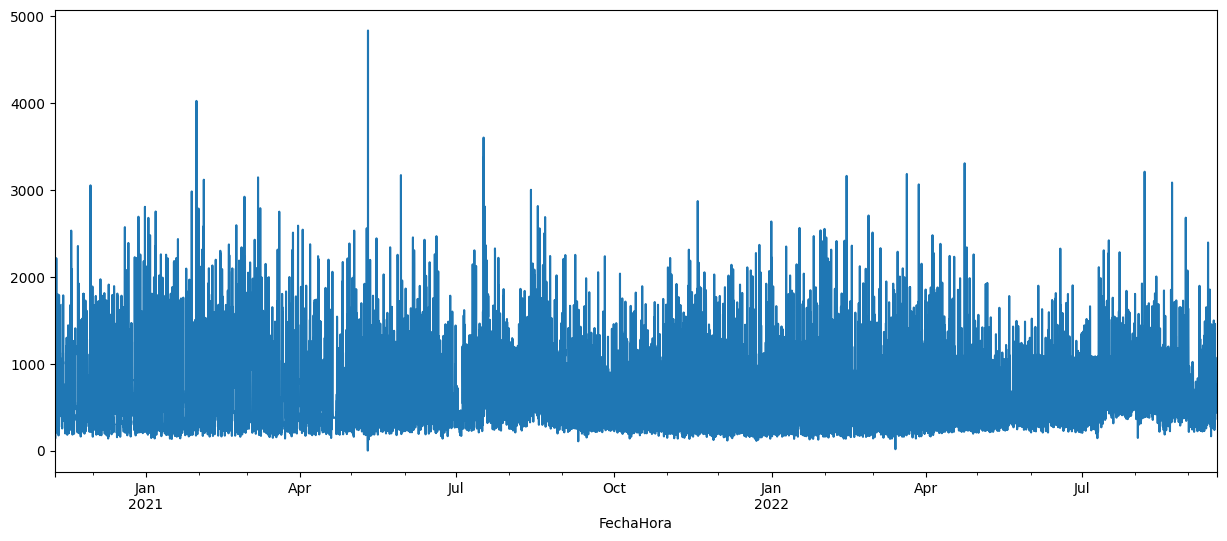

In [70]:
y.plot(figsize=(15, 6))
plt.show()

Visualizamos componentes de la prediccón como son la tendencia, la estacionalidad (por algún motivo sale mal) y la aleatoriedad

Se ha probado a cambiar a escala logarítmica para comporbar si se podía visualizar la gráfica "seasonal" sin obtener resultados

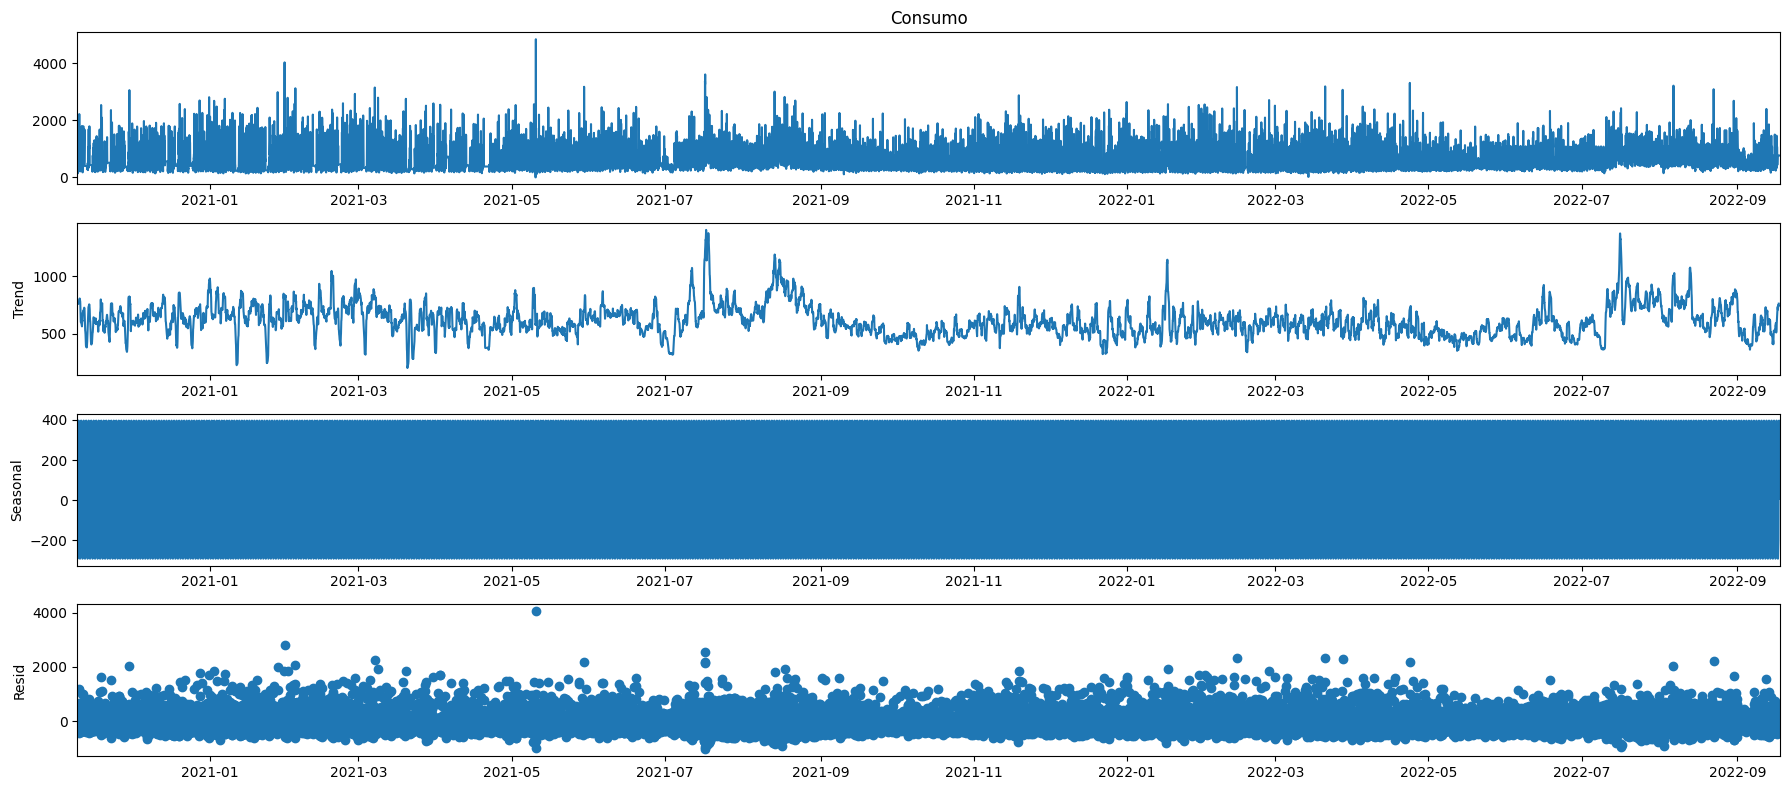

In [74]:
rcParams['figure.figsize'] = 18, 8

#y_log = np.log1p(y)
decomposition = sm.tsa.seasonal_decompose(y, model='additive')
fig = decomposition.plot()
plt.show()

Generamos una lista de combinaciones de parámetros para el modelo SARIMAX (Seasonal Autoregressive Integrated Moving Average with Exogenous Variables), tanto para los componentes no estacionales como para los componentes estacionales.

In [ ]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


Ajustamos una serie de modelos SARIMAX a una serie de tiempo utilizando diferentes combinaciones de parámetros no estacionales y estacionales. Luego, mostamos el valor del AIC para cada modelo ajustado.

In [ ]:
warnings.filterwarnings("ignore") # specify to ignore warning messages

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
  
            results = mod.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:261646.00253263148
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:258158.4492352546
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:256444.27335148596
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:241872.03351247453
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:253165.84985407948
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:243715.79974343727
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:243511.73402256903
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:240529.46023406973
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:251517.784317931
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:249536.55216860858
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:252009.3888341228
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:238542.48008129338
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:247379.38103687376
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:238741.2862037946
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:241825.20171900874
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:237936.7706255791
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:243734.23482995902
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:243565.4516886890

De todos los modelos ajustados anteriormente, escogemos el que menor valor AIC tiene para ajustar nuestro modelo y mostarar los coeficientes estimados del modelo

In [ ]:
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 1, 1),
                                seasonal_order=(1, 0, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3343      0.007     48.307      0.000       0.321       0.348
ma.L1         -0.9890      0.002   -635.655      0.000      -0.992      -0.986
ar.S.L12      -0.9972      0.001  -1108.659      0.000      -0.999      -0.995
ma.S.L12       0.9671      0.003    300.918      0.000       0.961       0.973
sigma2      1.601e+05   1260.283    127.039      0.000    1.58e+05    1.63e+05


Visualizamos los gráficos de diagnostico para evaluar la calidad del modelo 

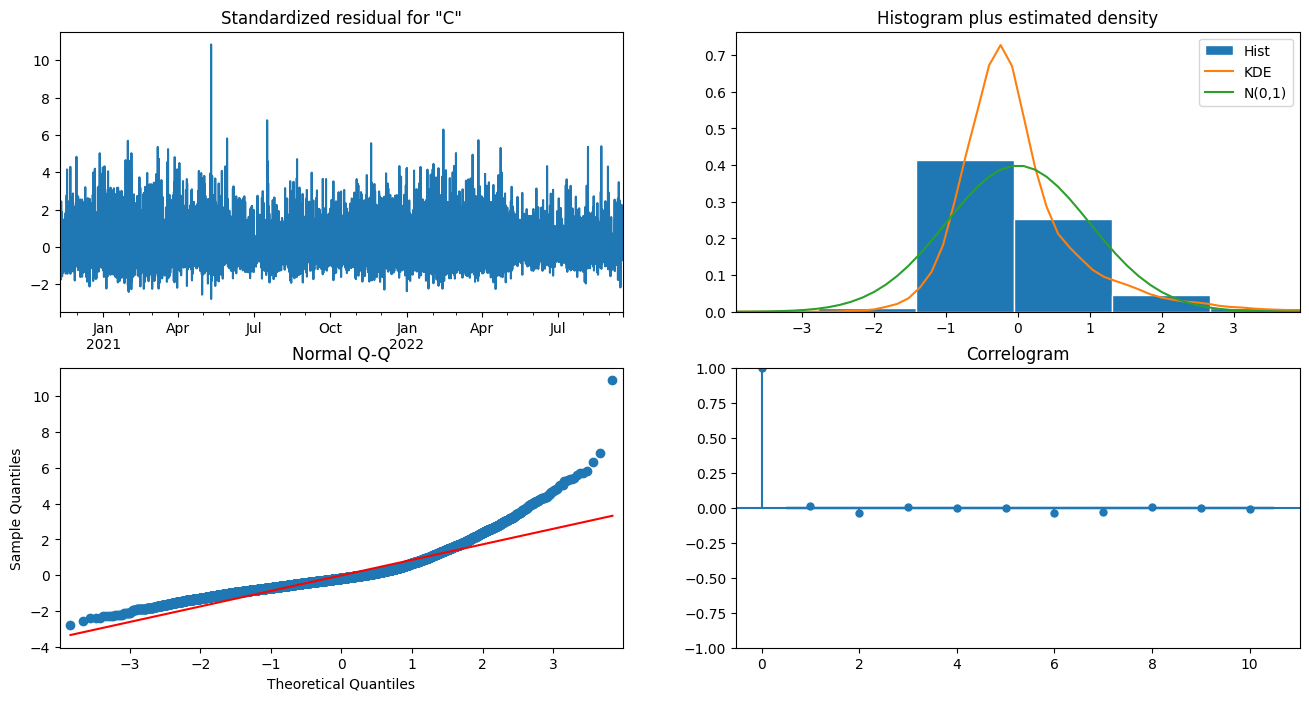

In [ ]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

Utilizando el modelo ajustado anteriormente visualizamos en un gráfico los datos observados junto con las predicciones

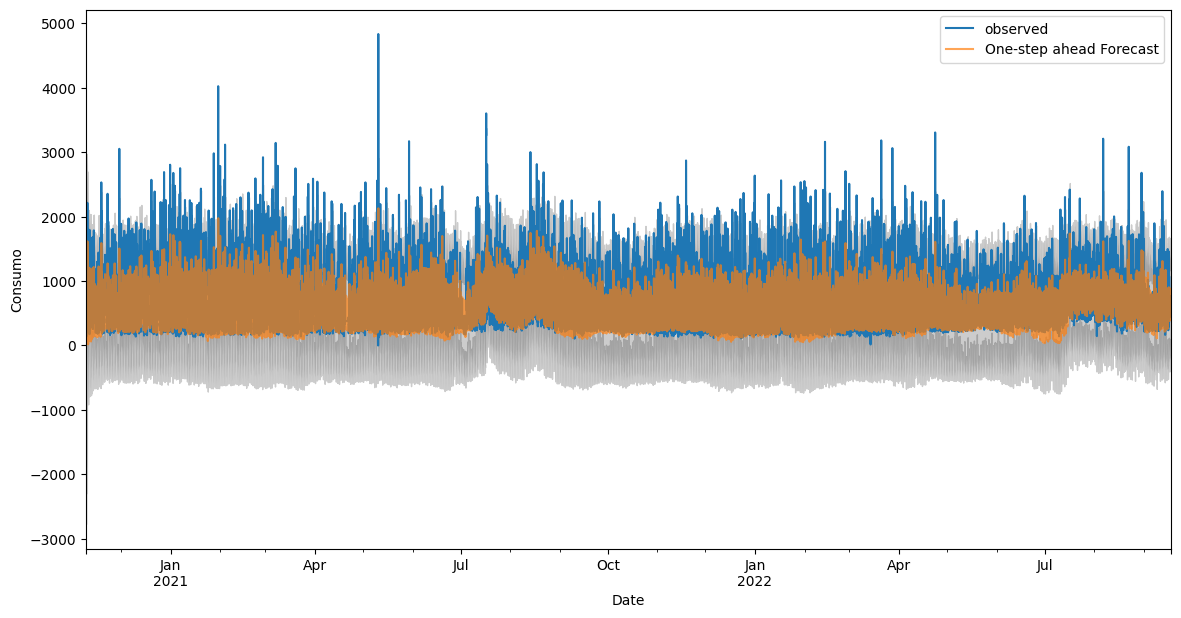

In [ ]:
pred = results.get_prediction(start=pd.to_datetime('2020-11-09'), dynamic=False)
pred_ci = pred.conf_int()

ax = y['2020':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Date')
ax.set_ylabel('Consumo')
plt.legend()

plt.show()

Cuantificamos el rendimiento predictivo de nuestras previsiones mediante el cálculo de la MSE

In [ ]:
y_forecasted = pred.predicted_mean
y_truth = y['2020-11-09':]

mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Mean Squared Error of our forecasts is 119863.2
The Root Mean Squared Error of our forecasts is 346.21


##Datos del quinto cliente

Leemos el archivo .csv que contiene los datos del consumo del cliente

In [76]:
df = pd.read_csv('/content/TFG/DatosClientes/ConsumoHorario_Cliente5.csv', sep=',')
df.head()

,FechaHora,Consumo
0,2020-11-09 00:00:00,69.0
1,2020-11-09 01:00:00,57.0
2,2020-11-09 02:00:00,43.0
3,2020-11-09 03:00:00,40.0
4,2020-11-09 04:00:00,35.0


Convertimos las fechas de la columna "FechaHora" a su tipo correcto

In [78]:
df['FechaHora'] = pd.to_datetime(df['FechaHora'])

Ponemos como indices del dataset las fechas para poder realizar una visualización de los datos del mismo

In [79]:
df = df.set_index('FechaHora')
df.index

DatetimeIndex(['2020-11-09 00:00:00', '2020-11-09 01:00:00',
               '2020-11-09 02:00:00', '2020-11-09 03:00:00',
               '2020-11-09 04:00:00', '2020-11-09 05:00:00',
               '2020-11-09 06:00:00', '2020-11-09 07:00:00',
               '2020-11-09 08:00:00', '2020-11-09 09:00:00',
               ...
               '2022-09-17 14:00:00', '2022-09-17 15:00:00',
               '2022-09-17 16:00:00', '2022-09-17 17:00:00',
               '2022-09-17 18:00:00', '2022-09-17 19:00:00',
               '2022-09-17 20:00:00', '2022-09-17 21:00:00',
               '2022-09-17 22:00:00', '2022-09-17 23:00:00'],
              dtype='datetime64[ns]', name='FechaHora', length=16272, freq=None)

Preparamos los datos para una correcta visualización gráfica

In [80]:
y = df['Consumo']
y['2020':]

FechaHora
2020-11-09 00:00:00    69.0
2020-11-09 01:00:00    57.0
2020-11-09 02:00:00    43.0
2020-11-09 03:00:00    40.0
2020-11-09 04:00:00    35.0
                       ... 
2022-09-17 19:00:00    76.0
2022-09-17 20:00:00    76.0
2022-09-17 21:00:00    76.0
2022-09-17 22:00:00    76.0
2022-09-17 23:00:00    76.0
Name: Consumo, Length: 16272, dtype: float64

Visualizamos los datos iniciales para poder detectar algún patrón que nos ayude a realizar el análisis.
Como se puede ver el consumo de energía de este cliente es elevado durante los meses más frios y más bajo en los meses cálidos

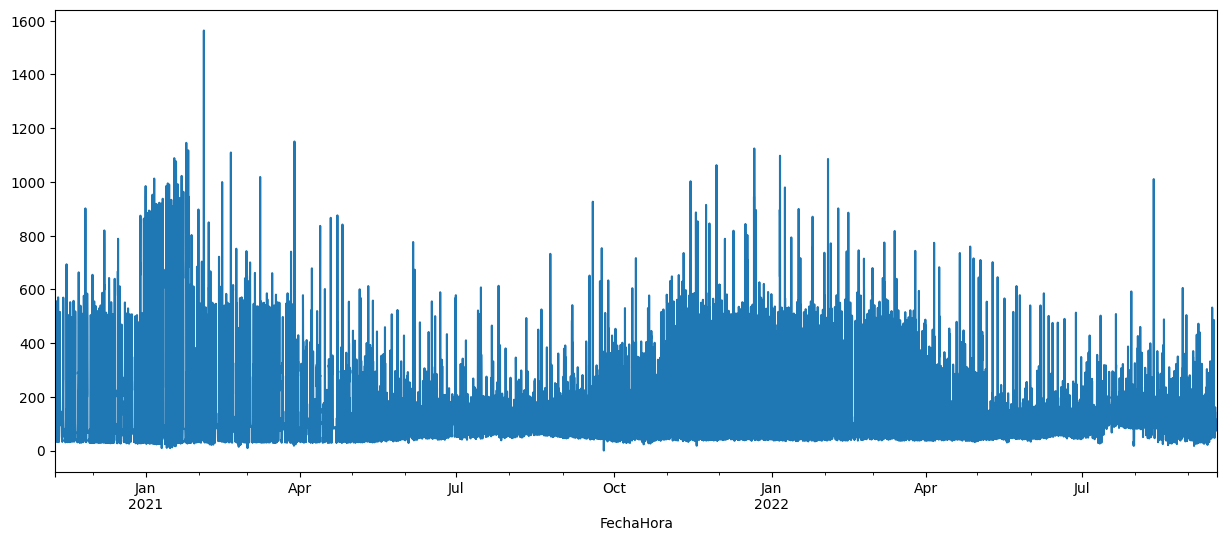

In [81]:
y.plot(figsize=(15, 6))
plt.show()

Visualizamos componentes de la prediccón como son la tendencia, la estacionalidad (por algún motivo sale mal) y la aleatoriedad

Se ha probado a cambiar a escala logarítmica para comporbar si se podía visualizar la gráfica "seasonal" sin obtener resultados

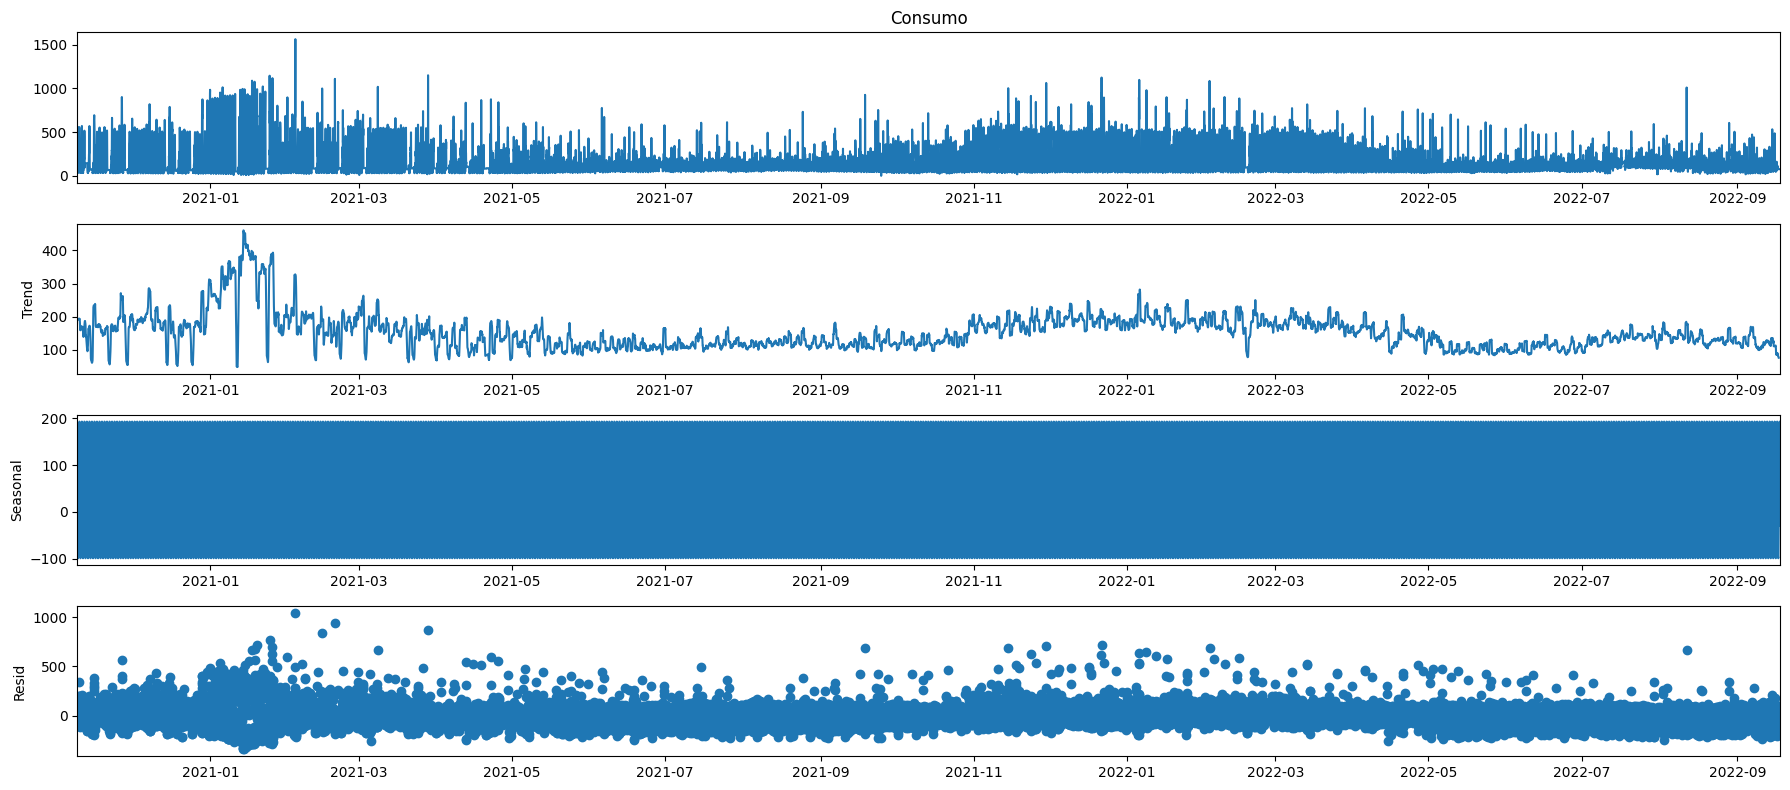

In [84]:
rcParams['figure.figsize'] = 18, 8

#y_log = np.log1p(y)
decomposition = sm.tsa.seasonal_decompose(y, model='additive')
fig = decomposition.plot()
plt.show()

Generamos una lista de combinaciones de parámetros para el modelo SARIMAX (Seasonal Autoregressive Integrated Moving Average with Exogenous Variables), tanto para los componentes no estacionales como para los componentes estacionales.

In [ ]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


Ajustamos una serie de modelos SARIMAX a una serie de tiempo utilizando diferentes combinaciones de parámetros no estacionales y estacionales. Luego, mostamos el valor del AIC para cada modelo ajustado.

In [ ]:
warnings.filterwarnings("ignore") # specify to ignore warning messages

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
  
            results = mod.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:220387.3655985486
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:219384.15101843805
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:224174.16018910907
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:205880.4201751222
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:217953.81869381526
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:206056.67066869373
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:199629.8382236016
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:197970.1398684318
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:207733.3128584845
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:207051.16620992724
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:213626.28303806944
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:197211.3183011475
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:206360.26909265478
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:197374.46865258485
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:195858.67116497448
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:193195.23934553794
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:196831.53412878697
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:196650.7161460176

De todos los modelos ajustados anteriormente, escogemos el que menor valor AIC tiene para ajustar nuestro modelo y mostarar los coeficientes estimados del modelo

In [ ]:
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 0, 1),
                                seasonal_order=(1, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6933      0.006    116.253      0.000       0.682       0.705
ma.L1         -0.0671      0.008     -8.740      0.000      -0.082      -0.052
ar.S.L12      -0.3559      0.006    -55.765      0.000      -0.368      -0.343
ma.S.L12      -0.9345      0.002   -450.797      0.000      -0.939      -0.930
sigma2      7414.8963     31.129    238.196      0.000    7353.884    7475.909


Visualizamos los gráficos de diagnostico para evaluar la calidad del modelo 

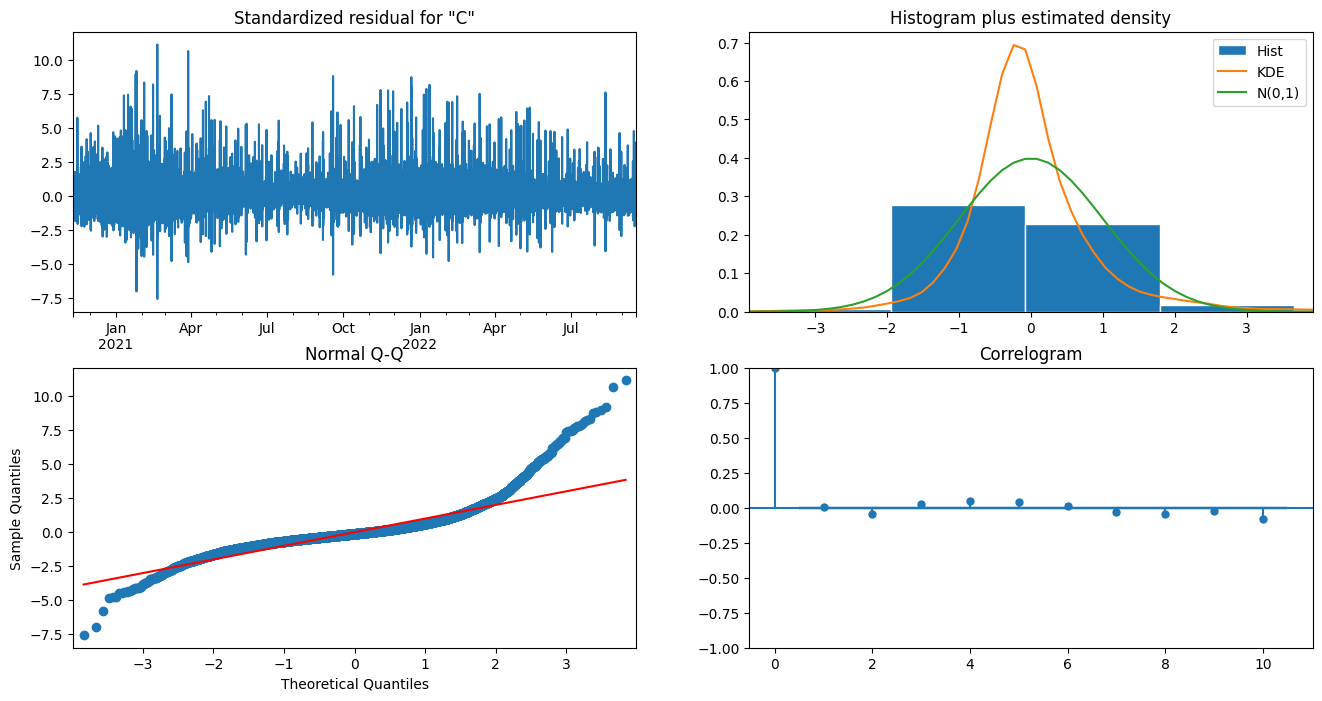

In [ ]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

Utilizando el modelo ajustado anteriormente visualizamos en un gráfico los datos observados junto con las predicciones

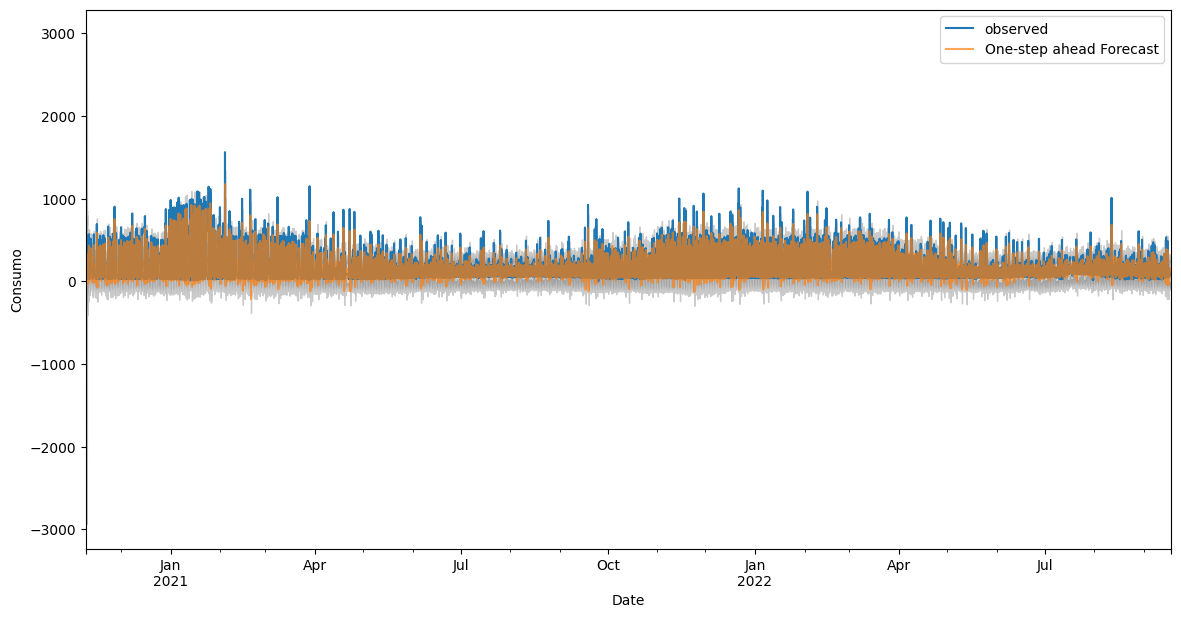

In [ ]:
pred = results.get_prediction(start=pd.to_datetime('2020-11-09'), dynamic=False)
pred_ci = pred.conf_int()

ax = y['2020':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Date')
ax.set_ylabel('Consumo')
plt.legend()

plt.show()

Cuantificamos el rendimiento predictivo de nuestras previsiones mediante el cálculo de la MSE

In [ ]:
y_forecasted = pred.predicted_mean
y_truth = y['2020-11-09':]

mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Mean Squared Error of our forecasts is 7440.59
The Root Mean Squared Error of our forecasts is 86.26


#Datos totales de un centro

Leemos el archivo .csv que contiene los datos del centro de transformación y quitamos algunas columnas sobrantes que no interesan para hacer la serie temporal 

In [45]:
df = pd.read_csv('/content/TFG/ConsumoHorario_ORM5965138300 .csv', sep=',')
df = df.drop(['id', 'Cnt'], axis = 1)
df.head()

,FechaHora,Consumo
0,2020-11-09 00:00:00,46000.0
1,2020-11-09 01:00:00,34000.0
2,2020-11-09 02:00:00,27000.0
3,2020-11-09 03:00:00,25000.0
4,2020-11-09 04:00:00,22000.0


Convertimos las fechas de la columna "FechaHora" a su tipo correcto

In [46]:
df['FechaHora'] = pd.to_datetime(df['FechaHora'])

Ponemos como indices del dataset las fechas para poder realizar una visualización de los datos del mismo

In [47]:
df = df.set_index('FechaHora')
df.index

DatetimeIndex(['2020-11-09 00:00:00', '2020-11-09 01:00:00',
               '2020-11-09 02:00:00', '2020-11-09 03:00:00',
               '2020-11-09 04:00:00', '2020-11-09 05:00:00',
               '2020-11-09 06:00:00', '2020-11-09 07:00:00',
               '2020-11-09 08:00:00', '2020-11-09 09:00:00',
               ...
               '2022-09-17 14:00:00', '2022-09-17 15:00:00',
               '2022-09-17 16:00:00', '2022-09-17 17:00:00',
               '2022-09-17 18:00:00', '2022-09-17 19:00:00',
               '2022-09-17 20:00:00', '2022-09-17 21:00:00',
               '2022-09-17 22:00:00', '2022-09-17 23:00:00'],
              dtype='datetime64[ns]', name='FechaHora', length=16272, freq=None)

Preparamos los datos para una correcta visualización gráfica

In [48]:
y = df['Consumo']
y['2020':]

FechaHora
2020-11-09 00:00:00    46000.0
2020-11-09 01:00:00    34000.0
2020-11-09 02:00:00    27000.0
2020-11-09 03:00:00    25000.0
2020-11-09 04:00:00    22000.0
                        ...   
2022-09-17 19:00:00    31298.0
2022-09-17 20:00:00    31298.0
2022-09-17 21:00:00    31298.0
2022-09-17 22:00:00    31298.0
2022-09-17 23:00:00    31298.0
Name: Consumo, Length: 16272, dtype: float64

Visualizamos los datos iniciales para poder detectar algún patrón que nos ayude a realizar el análisis.
Como se puede ver en los meses de invierno se consume más energía que en los meses de primavera

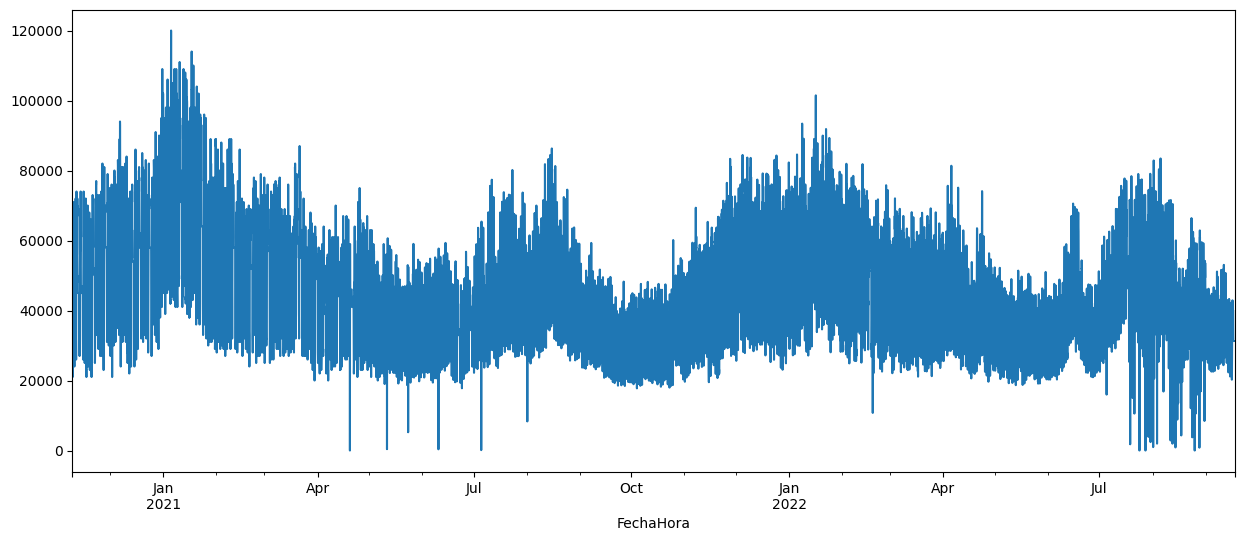

In [49]:
y.plot(figsize=(15, 6))
plt.show()

Visualizamos componentes de la prediccón como son la tendencia, la estacionalidad (por algún motivo sale mal) y la aleatoriedad

Se ha probado a cambiar a escala logarítmica para comporbar si se podía visualizar la gráfica "seasonal" sin obtener resultados

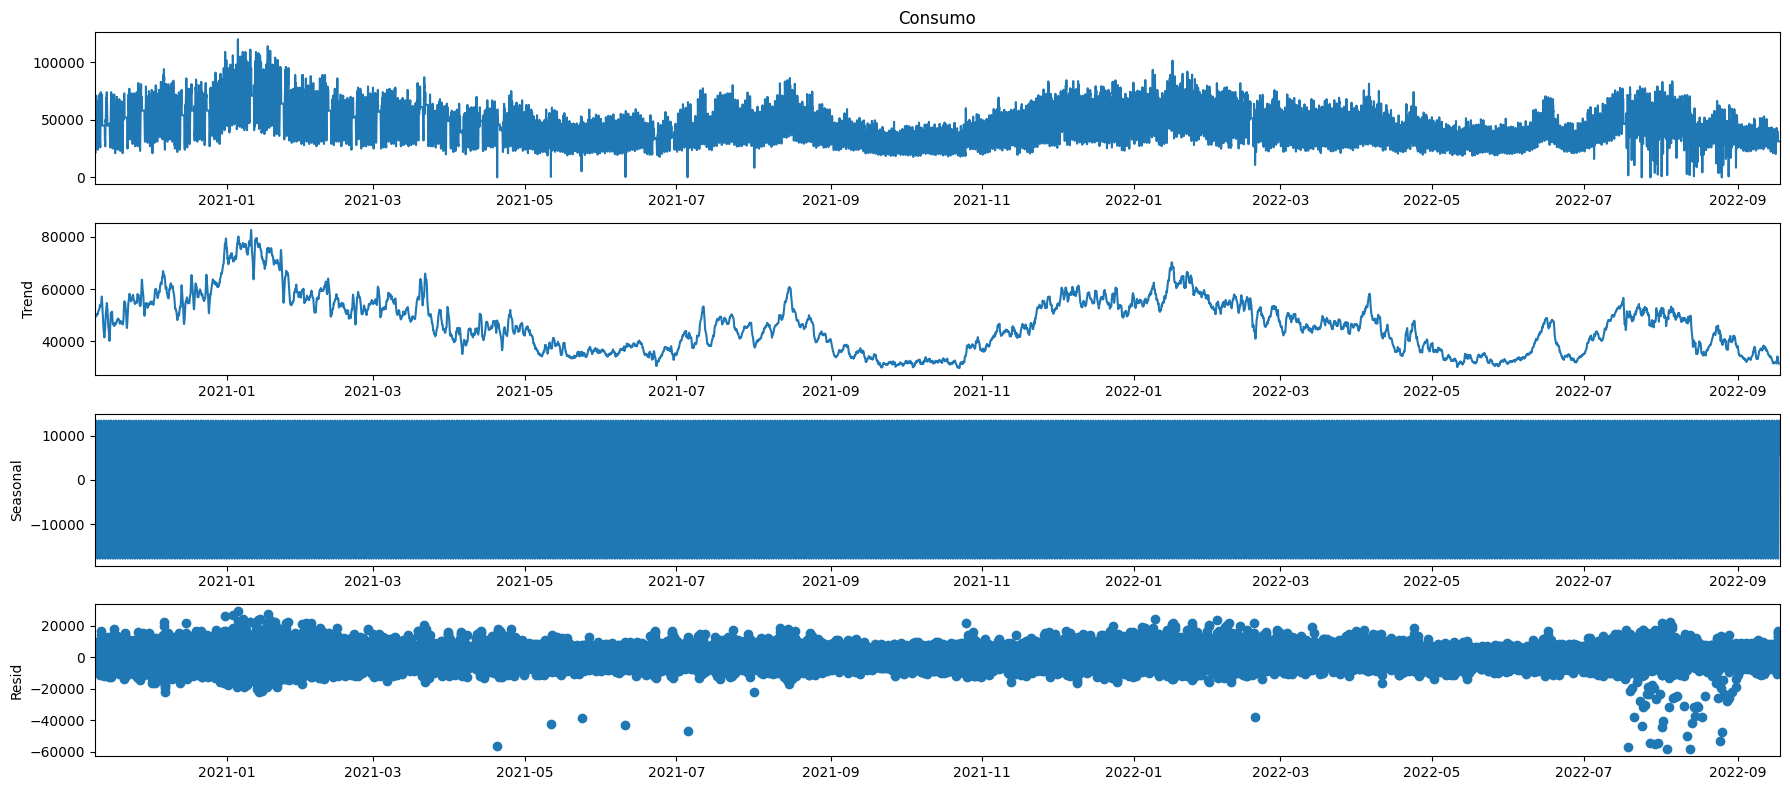

In [50]:
rcParams['figure.figsize'] = 18, 8

#y_log = np.log1p(y)
decomposition = sm.tsa.seasonal_decompose(y, model='additive')
fig = decomposition.plot()
plt.show()

Generamos una lista de combinaciones de parámetros para el modelo SARIMAX (Seasonal Autoregressive Integrated Moving Average with Exogenous Variables), tanto para los componentes no estacionales como para los componentes estacionales.

In [ ]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


Ajustamos una serie de modelos SARIMAX a una serie de tiempo utilizando diferentes combinaciones de parámetros no estacionales y estacionales. Luego, mostamos el valor del AIC para cada modelo ajustado.

In [ ]:
warnings.filterwarnings("ignore") # specify to ignore warning messages

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
  
            results = mod.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:397564.42973780626
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:390791.4037901986
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:370295.5635102296
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:358752.78992349573
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:369525.4612540086
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:358668.2208553517
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:335484.8684768923
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:335465.2151051876
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:385930.71084334794
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:383803.6238696655
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:359039.9874205333
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:356881.5709773316
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:381944.5596979983
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:381168.7175779599
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:356747.85058933165
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:356005.7965072233
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:331615.75457757496
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:331373.3389484509
ARIMA

De todos los modelos ajustados anteriormente, escogemos el que menor valor AIC tiene para ajustar nuestro modelo y mostarar los coeficientes estimados del modelo

In [ ]:
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 1, 1),
                                seasonal_order=(0, 0, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)

results = mod.fit()

print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5108      0.045     11.463      0.000       0.423       0.598
ma.L1         -0.3928      0.045     -8.791      0.000      -0.480      -0.305
ma.S.L12       0.0089      0.006      1.607      0.108      -0.002       0.020
sigma2      4.089e+07   2.83e-09   1.44e+16      0.000    4.09e+07    4.09e+07


Visualizamos los gráficos de diagnostico para evaluar la calidad del modelo 

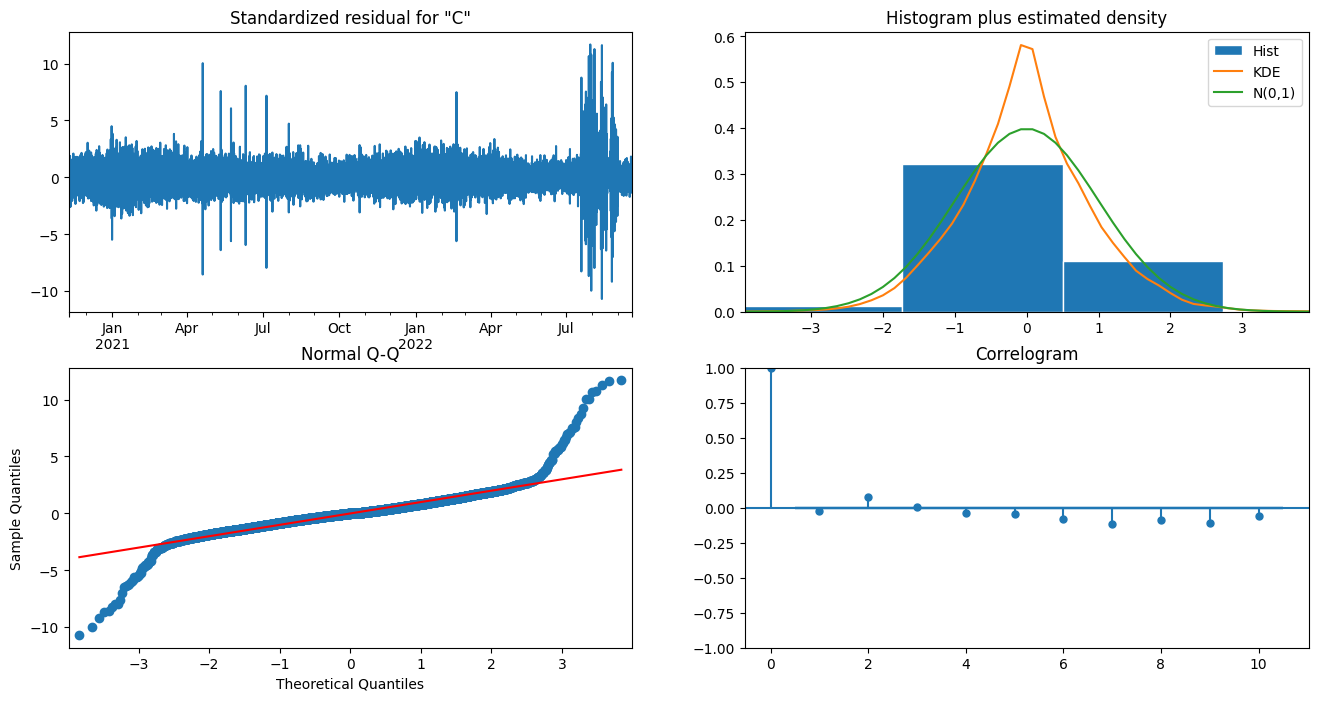

In [ ]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

Utilizando el modelo ajustado anteriormente visualizamos en un gráfico los datos observados junto con las predicciones

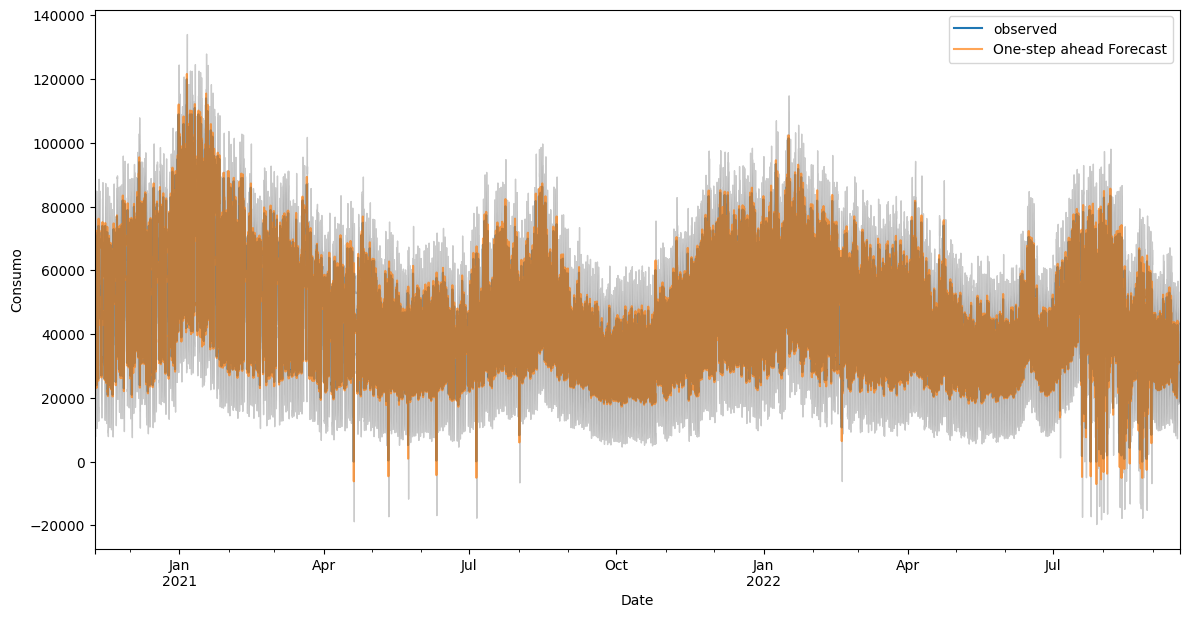

In [ ]:
pred = results.get_prediction(start=pd.to_datetime('2020-11-09'), dynamic=False)
pred_ci = pred.conf_int()

ax = y['2020':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Date')
ax.set_ylabel('Consumo')
plt.legend()

plt.show()

Cuantificamos el rendimiento predictivo de nuestras previsiones mediante el cálculo de la MSE

In [ ]:
y_forecasted = pred.predicted_mean
y_truth = y['2020-11-09':]

mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Mean Squared Error of our forecasts is 41021560.62
The Root Mean Squared Error of our forecasts is 6404.81
